# Two dimensional turbulence example

In this example, we initialize a random velocity field and observe its viscous,
turbulent decay in a two-dimensional domain. This example demonstrates:

  * How to run a model with no buoyancy equation or tracers;
  * How to create user-defined fields
  * How to use differentiation functions

For this example, we need `PyPlot` for plotting and `Statistics` for setting up
a random initial condition with zero mean velocity.

In [1]:
using Oceananigans, PyPlot, Statistics, Oceananigans.AbstractOperations

In addition to importing plotting and statistics packages, we import
some types from `Oceananigans` that will aid in the calculation
and visualization of voriticty.

In [2]:
using Oceananigans: Face, Cell

We instantiate the model with a simple isotropic diffusivity

In [3]:
model = Model(
        grid = RegularCartesianGrid(N=(128, 128, 1), L=(2π, 2π, 2π)),
    buoyancy = nothing,
     tracers = nothing,
     closure = ConstantIsotropicDiffusivity(ν=1e-3, κ=1e-3)
);

Our initial condition randomizes `u` and `v`. We also ensure that both have
zero mean for purely aesthetic reasons.

In [4]:
u₀ = rand(size(model.grid)...)
u₀ .-= mean(u₀)

set!(model, u=u₀, v=u₀)

Finally, we create the vorticity field for storing `u` and `v`, initialize a
figure, and run the model forward

In [8]:
u, v, w = model.velocities

# Create an object that represents the 'operation' required to compute vorticity.
vorticity_operation = ∂x(v) - ∂y(u)
kinetic_energy = @at (Cell, Cell, Cell) (u^2 + v^2 + w^2) / 2
#ω = Field(Face, Face, Cell, model.architecture, model.grid)
#vorticity_computation = Computation(vorticity_operation, ω)

BinaryOperation at (Cell, Cell, Cell)
├── grid: RegularCartesianGrid{Float64,StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}
│   ├── size: (128, 128, 1)
│   └── domain: x ∈ [0.0, 6.283185307179586], y ∈ [0.0, 6.283185307179586], z ∈ [0.0, -6.283185307179586]
└── tree: 

/ at (Cell, Cell, Cell) via Oceananigans.AbstractOperations.identity
├── + at (Cell, Cell, Cell)
│   ├── ^ at (Cell, Cell, Cell) via Oceananigans.TurbulenceClosures.▶x_caa
│   │   ├── OffsetArrays.OffsetArray{Float64,3,Array{Float64,3}}
│   │   └── 2
│   ├── ^ at (Cell, Cell, Cell) via Oceananigans.TurbulenceClosures.▶y_aca
│   │   ├── OffsetArrays.OffsetArray{Float64,3,Array{Float64,3}}
│   │   └── 2
│   └── ^ at (Cell, Cell, Cell) via Oceananigans.TurbulenceClosures.▶z_aac
    │   ├── OffsetArrays.OffsetArray{Float64,3,Array{Float64,3}}
    │   └── 2
└── 2

The object `vorticity_computation` coordinates calculating `vorticity_operation` and storing the result in `ω`.
We ask for this task by writing 

`compute!(vorticity_computation)`,

as shown below.

Finally, we run the model.

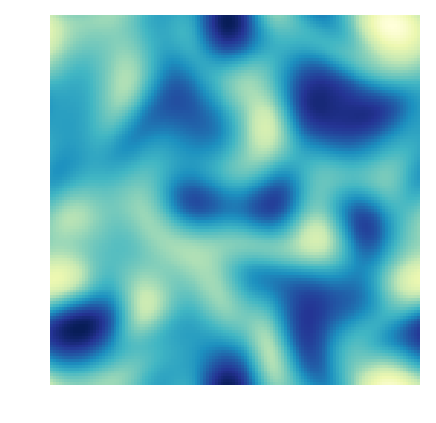

In [6]:
fig, ax = subplots()

for i = 1:10
    time_step!(model, Nt=100, Δt=1e-1)

    compute!(vorticity_computation)

    cla()
    imshow(ω[:, :, 1])
    ax.axis("off")
    pause(0.1)
end

display()

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*